# Analysis performed using primarily matplotlib

In [1]:
import matplotlib.dates as mdates
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
# import cleaned data file
df = pd.read_csv("_data/df-clean.csv")

In [3]:
df.head()

,Unnamed: 0,Job,Clocked In,Clocked Out,Duration,Earnings,Date,Month,Day,Year,Is Holiday,Holiday Name,Day of Week,Hourly Rate,Season
0,0,Macianos,16:40:00,18:45:00,2.08,59,2020-08-03,8,3,2020,False,NaN,Monday,28.37,Summer
1,1,Macianos,16:08:00,21:52:00,5.73,108,2020-08-04,8,4,2020,False,NaN,Tuesday,18.85,Summer
2,2,Macianos,17:01:00,21:15:00,4.23,81,2020-08-05,8,5,2020,False,NaN,Wednesday,19.15,Summer
3,3,Macianos,16:25:00,22:17:00,5.87,124,2020-08-06,8,6,2020,False,NaN,Thursday,21.12,Summer
4,4,Macianos,16:25:00,21:30:00,5.08,122,2020-08-07,8,7,2020,False,NaN,Friday,24.02,Summer


In [4]:
# Average amount of tips over time
print("Mean of Earnings:", (np.mean(df['Earnings'])).round(2) )
print("Median of Earnings:", (np.median(df['Earnings'])).round(2) )

Mean of Earnings: 133.27
Median of Earnings: 119.0


In [5]:
# separate data into $3 vs $4 tips
tip_3 = df[df['Job'] == 'Macianos']
tip_4 = df[df['Job'] == 'Maciano 2']

tip_4
tip_3

,Unnamed: 0,Job,Clocked In,Clocked Out,Duration,Earnings,Date,Month,Day,Year,Is Holiday,Holiday Name,Day of Week,Hourly Rate,Season
0,0,Macianos,16:40:00,18:45:00,2.08,59,2020-08-03,8,3,2020,False,NaN,Monday,28.37,Summer
1,1,Macianos,16:08:00,21:52:00,5.73,108,2020-08-04,8,4,2020,False,NaN,Tuesday,18.85,Summer
2,2,Macianos,17:01:00,21:15:00,4.23,81,2020-08-05,8,5,2020,False,NaN,Wednesday,19.15,Summer
3,3,Macianos,16:25:00,22:17:00,5.87,124,2020-08-06,8,6,2020,False,NaN,Thursday,21.12,Summer
4,4,Macianos,16:25:00,21:30:00,5.08,122,2020-08-07,8,7,2020,False,NaN,Friday,24.02,Summer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,175,Macianos,14:22:00,20:06:00,5.73,174,2021-06-27,6,27,2021,False,NaN,Sunday,30.37,Summer
176,176,Macianos,16:00:00,20:45:00,4.75,100,2021-07-01,7,1,2021,False,NaN,Thursday,21.05,Summer
177,177,Macianos,16:21:00,20:28:00,4.12,119,2021-07-02,7,2,2021,False,NaN,Friday,28.88,Summer
178,178,Macianos,16:20:00,20:49:00,4.48,108,2021-07-03,7,3,2021,False,NaN,Saturday,24.11,Summer


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308 entries, 0 to 307
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    308 non-null    int64  
 1   Job           308 non-null    object 
 2   Clocked In    308 non-null    object 
 3   Clocked Out   308 non-null    object 
 4   Duration      308 non-null    float64
 5   Earnings      308 non-null    int64  
 6   Date          308 non-null    object 
 7   Month         308 non-null    int64  
 8   Day           308 non-null    int64  
 9   Year          308 non-null    int64  
 10  Is Holiday    308 non-null    bool   
 11  Holiday Name  18 non-null     object 
 12  Day of Week   308 non-null    object 
 13  Hourly Rate   308 non-null    float64
 14  Season        308 non-null    object 
dtypes: bool(1), float64(2), int64(5), object(7)
memory usage: 34.1+ KB


### Line Chart Analysis

#### Line Chart 1

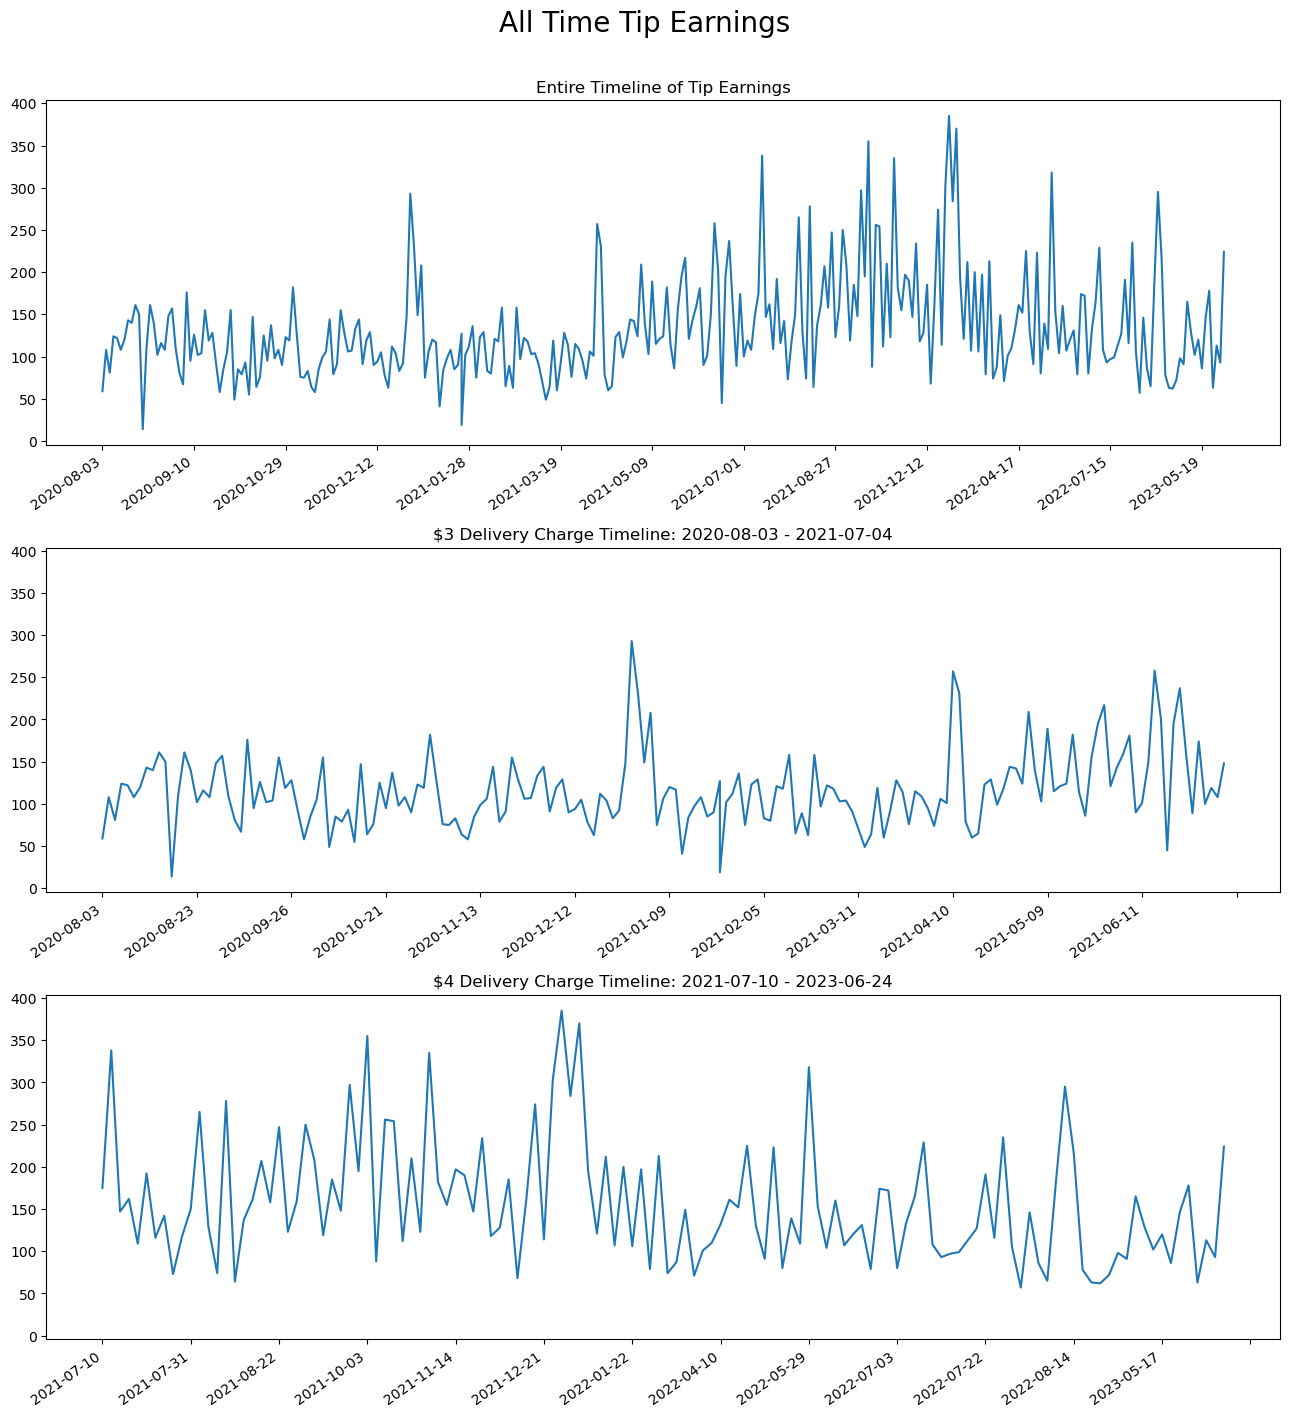

In [7]:
# Line Charts for tip earnings: all time, $3 period, $4 period

fig, axs = plt.subplots(3, 1, figsize=(13, 14), sharey=True)

plt.suptitle('All Time Tip Earnings', y=1.009, fontsize=20)

# 1. Line chart of earning over all shifts worked
days      = list(df['Date'])
earnings  = list(df['Earnings'])
axs[0].plot(days, earnings)
# this sets predetermined number of ticks, resource link 1
axs[0].xaxis.set_major_locator(plt.MaxNLocator(15))
axs[0].set_title('Entire Timeline of Tip Earnings')

# 2. Line chart over the $3 delivery charge time period, 180 total days
# 2020-08-03 - 2021-07-04
delivery_charge_3 = df[df['Job'] == 'Macianos']
days      = list(delivery_charge_3['Date'])
earnings  = list(delivery_charge_3['Earnings'])
axs[1].plot(days, earnings)
# this sets predetermined number of ticks, resource link 1
axs[1].xaxis.set_major_locator(plt.MaxNLocator(15))
axs[1].set_title('$3 Delivery Charge Timeline: 2020-08-03 - 2021-07-04')

# 3. Line chart over the $4 delivery charge time period, 180 total days
# 2021-07-10 - 2023-06-24
delivery_charge_4 = df[df['Job'] == 'Maciano 2']
days      = list(delivery_charge_4['Date'])
earnings  = list(delivery_charge_4['Earnings'])
axs[2].plot(days, earnings)
# this sets predetermined number of ticks, resource link 1
axs[2].xaxis.set_major_locator(plt.MaxNLocator(15))
axs[2].set_title('$4 Delivery Charge Timeline: 2021-07-10 - 2023-06-24')

# rotate x-axis labels for all subplots
for ax in axs:
    # Adjust the rotation angle, alighn label to the right
    plt.setp(ax.get_xticklabels(), rotation=35, ha='right')  

plt.tight_layout()
plt.show()


#### Line Chart 2

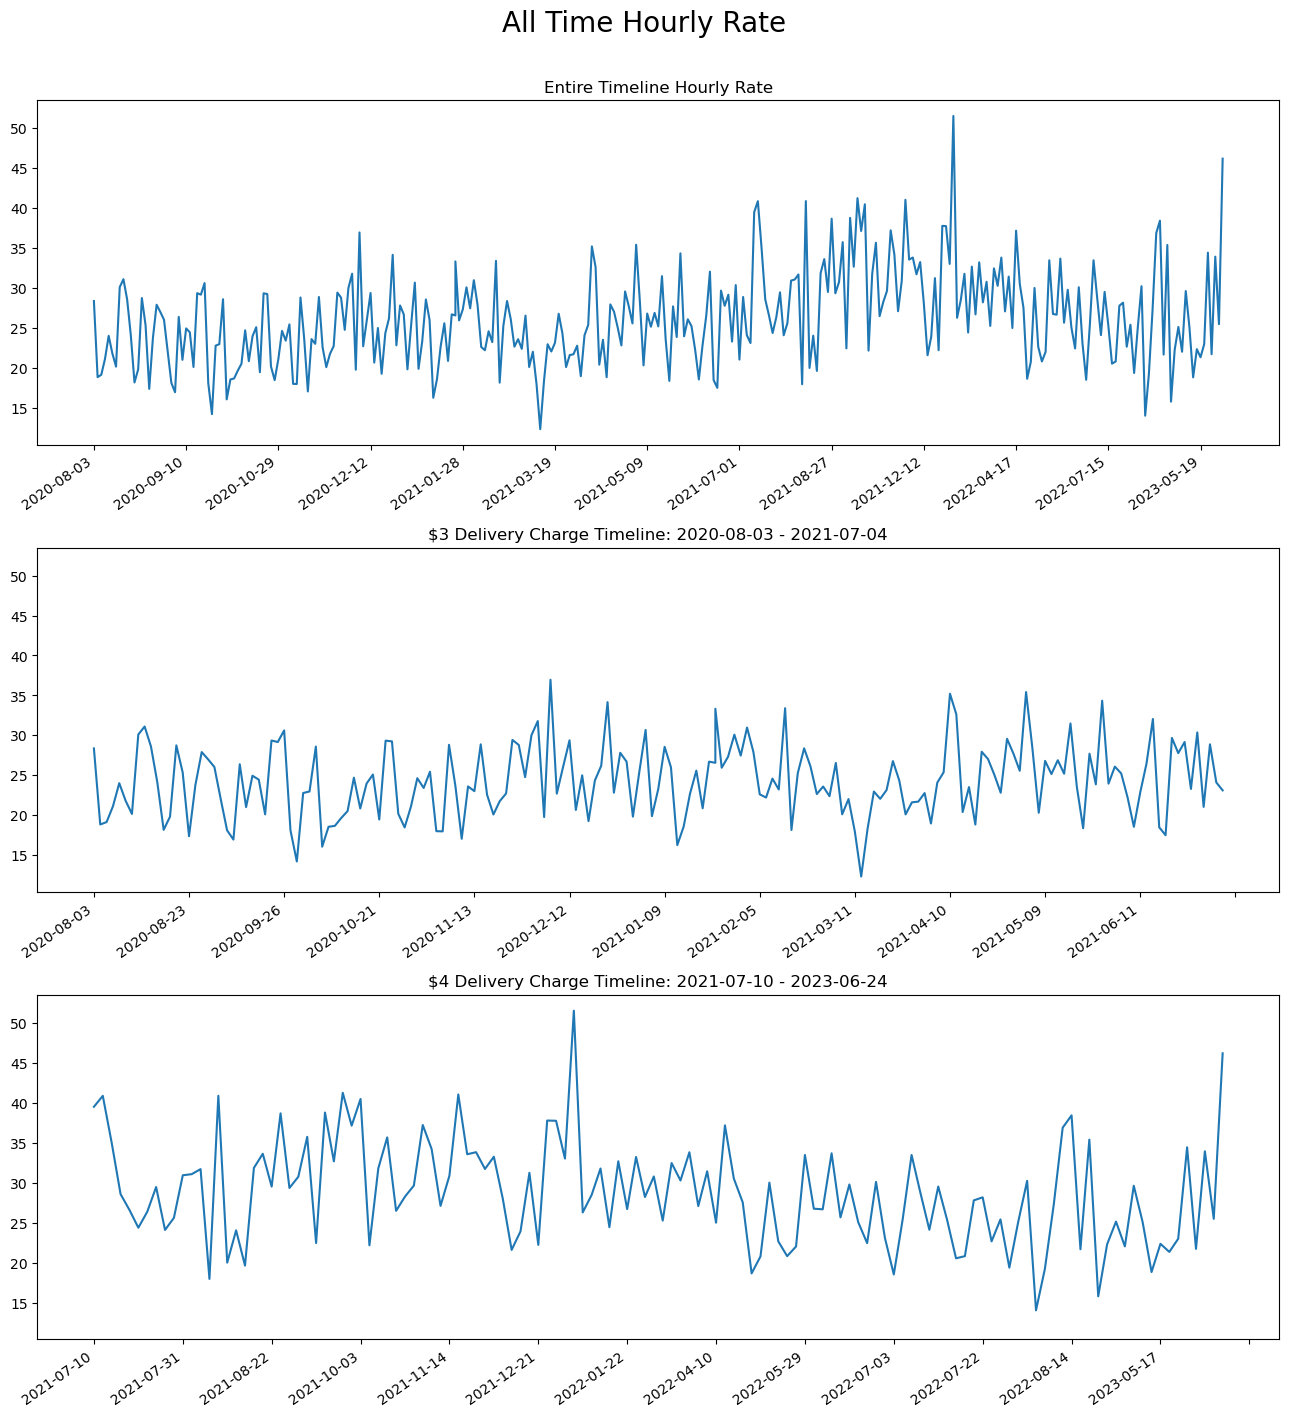

In [8]:
# Line Charts for Hourly Average: all time, $3 period, $4 period

fig, axs = plt.subplots(3, 1, figsize=(13, 14), sharey=True)

plt.suptitle('All Time Hourly Rate', y=1.009, fontsize=20)

# 1. Line chart of hourly over all shifts worked
days      = list(df['Date'])
earnings  = list(df['Hourly Rate'])
axs[0].plot(days, earnings)
# this sets predetermined number of ticks, resource link 1
axs[0].xaxis.set_major_locator(plt.MaxNLocator(15))
axs[0].set_title('Entire Timeline Hourly Rate')

# 2. Line chart over the $3 delivery charge time period, 180 total days
# 2020-08-03 - 2021-07-04
delivery_charge_3 = df[df['Job'] == 'Macianos']
days      = list(delivery_charge_3['Date'])
earnings  = list(delivery_charge_3['Hourly Rate'])
axs[1].plot(days, earnings)
# this sets predetermined number of ticks, resource link 1
axs[1].xaxis.set_major_locator(plt.MaxNLocator(15))
axs[1].set_title('$3 Delivery Charge Timeline: 2020-08-03 - 2021-07-04')

# 3. Line chart over the $4 delivery charge time period, 180 total days
# 2021-07-10 - 2023-06-24
delivery_charge_4 = df[df['Job'] == 'Maciano 2']
days      = list(delivery_charge_4['Date'])
earnings  = list(delivery_charge_4['Hourly Rate'])
axs[2].plot(days, earnings)
# this sets predetermined number of ticks, resource link 1
axs[2].xaxis.set_major_locator(plt.MaxNLocator(15))
axs[2].set_title('$4 Delivery Charge Timeline: 2021-07-10 - 2023-06-24')

# rotate x-axis labels for all subplots
for ax in axs:
    # Adjust the rotation angle, alighn label to the right
    plt.setp(ax.get_xticklabels(), rotation=35, ha='right')  

plt.tight_layout()
plt.show()


### Barchart Analysis

#### Barchart 1

In [9]:
# create dataframes for $3 and $4 delivery charges
tip_3 = df[df['Job'] == 'Macianos']
tip_4 = df[df['Job'] == 'Maciano 2']

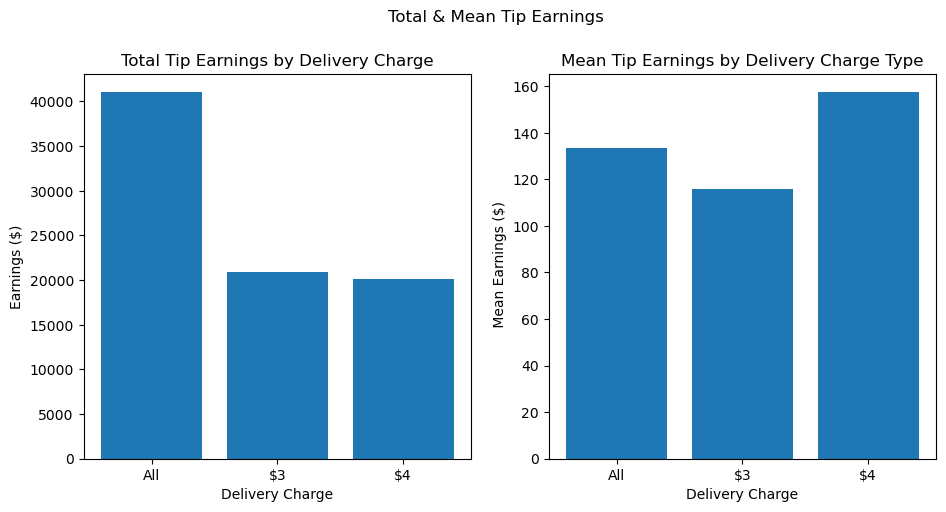

In [10]:
fig, axs = plt.subplots(1, 2, figsize=(11, 5))

plt.suptitle("Total & Mean Tip Earnings", y=1.008)

# 1. barchart to show all tips : all vs $3 vs $4
containers = ['All', '$3', '$4']
counts = [df['Earnings'].sum(), tip_3['Earnings'].sum(), tip_4['Earnings'].sum()]

# create barchart
axs[0].bar(containers, counts)
# set title, labels, etc.
axs[0].set_title('Total Tip Earnings by Delivery Charge')
axs[0].set_xlabel('Delivery Charge')
axs[0].set_ylabel('Earnings ($)')


# 2. barchart to show all tips : all vs $3 vs $4

containers = ['All', '$3', '$4']
counts = [df['Earnings'].mean(), tip_3['Earnings'].mean(), tip_4['Earnings'].mean()]

# create barchart
axs[1].bar(containers, counts)
# set title, labels, etc.
axs[1].set_title('Mean Tip Earnings by Delivery Charge Type')
axs[1].set_xlabel('Delivery Charge')
axs[1].set_ylabel(' Mean Earnings ($)')

plt.show()

#### Barchart 2

In [11]:
# add an order to the day of the week column
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df['Day of Week'] = pd.Categorical(df['Day of Week'], categories=day_order, ordered=True)

/var/folders/8l/b4fvd6ps1t9_651ysh_n9rcr0000gn/T/ipykernel_29690/3160730955.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  values = df.groupby(['Day of Week'])['Earnings'].sum()
/var/folders/8l/b4fvd6ps1t9_651ysh_n9rcr0000gn/T/ipykernel_29690/3160730955.py:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  values = df.groupby(['Day of Week'])['Earnings'].mean()


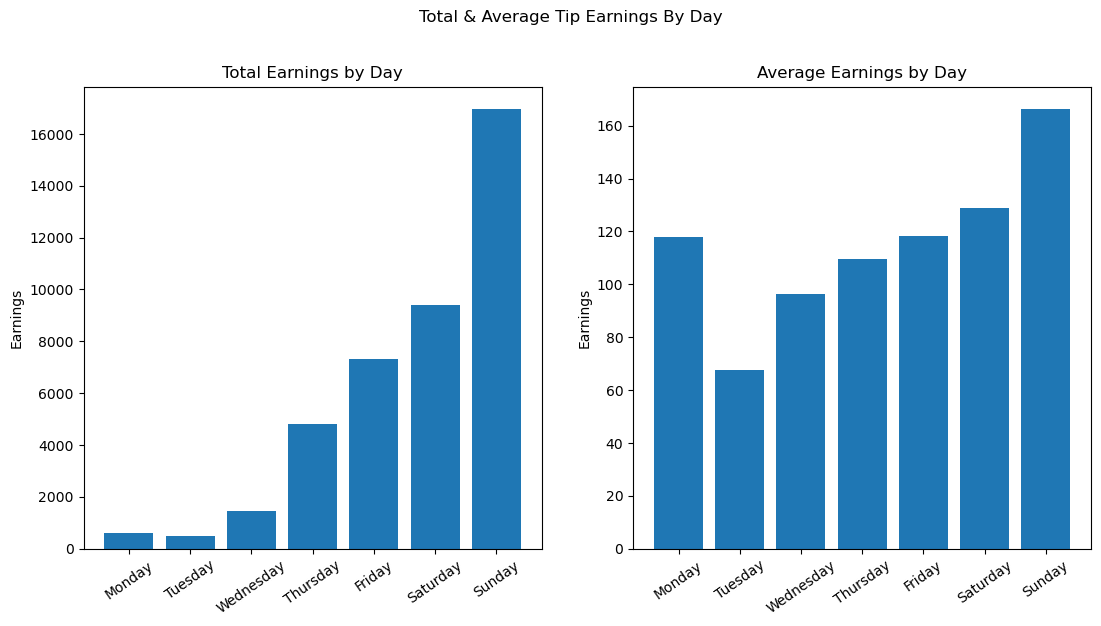

In [12]:
fig, axs = plt.subplots(1, 2, figsize=(13, 6))
containers = df['Day of Week'].unique()

plt.suptitle("Total & Average Tip Earnings By Day", y=1.008)

# 1. total tips earned by day of week
values = df.groupby(['Day of Week'])['Earnings'].sum()

axs[0].bar(containers, values)
axs[0].set_ylabel('Earnings')
axs[0].set_title('Total Earnings by Day')

plt.setp(axs[0].get_xticklabels(), rotation=35, ha='center')

# 2. average tips earned by day of week
values = df.groupby(['Day of Week'])['Earnings'].mean()

axs[1].bar(containers, values)
axs[1].set_ylabel('Earnings')
axs[1].set_title('Average Earnings by Day')

plt.setp(axs[1].get_xticklabels(), rotation=35, ha='center')

plt.show()

#### Barchart 3

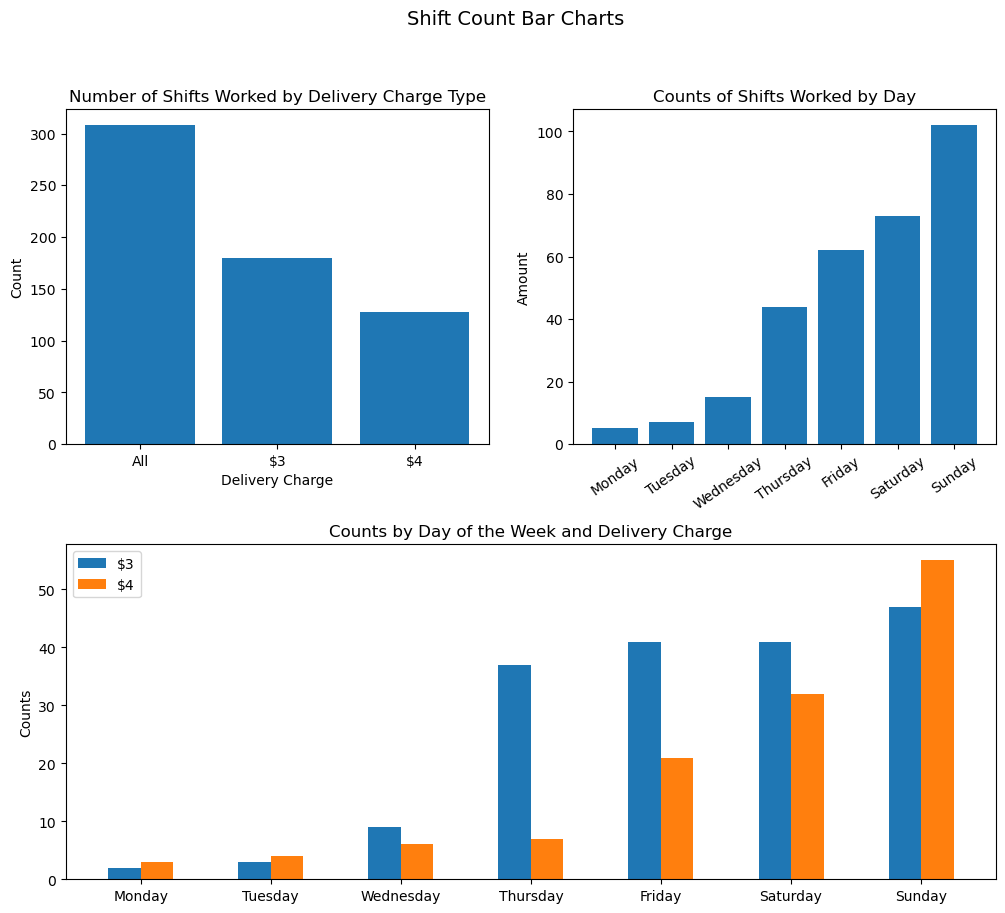

In [13]:
fig = plt.figure(figsize=(12, 10))

# set up gridspec layout
gs = gridspec.GridSpec(2, 2, hspace=0.3)

# main title
fig.suptitle('Shift Count Bar Charts', fontsize=14)

################################################################################
# 1. barchart to show amounts of shifts worked : all vs $3 vs $4
containers = ['All', '$3', '$4']
counts = [len(df), len(tip_3), len(tip_4)]

ax1 = fig.add_subplot(gs[0, 0])
ax1.set_title('Number of Shifts Worked by Delivery Charge Type')
ax1.set_xlabel('Delivery Charge')
ax1.set_ylabel('Count')
plt.bar(containers, counts)

################################################################################
# 2. total shift count by day of week
day_counts = df['Day of Week'].value_counts()
# convert 'Day of Week' in day_counts to a categorical type for proper ordering
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
day_counts.index = pd.Categorical(day_counts.index, categories=day_order, ordered=True)
day_counts = day_counts.sort_index()
ax2 = fig.add_subplot(gs[0, 1])
ax2.set_ylabel('Amount')
ax2.set_title('Counts of Shifts Worked by Day')

plt.bar(day_counts.index, day_counts.values)
plt.setp(ax2.get_xticklabels(), rotation=35, ha='center')
plt.setp(ax.get_xticklabels(), rotation=35, ha='right')

################################################################################
# 3. side by side of total tips earned by day of week
# resource link 2

day_order = ('Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday')

# prep the data
tip3_counts = tip_3.groupby(['Day of Week'])['Job'].count()
tip4_counts = tip_4.groupby(['Day of Week'])['Job'].count()

# convert 'Day of Week' in day_counts to a categorical type for proper ordering
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
tip3_counts.index = pd.Categorical(tip3_counts.index, categories=day_order, ordered=True)
tip3_counts = tip3_counts.sort_index()
tip4_counts.index = pd.Categorical(tip4_counts.index, categories=day_order, ordered=True)
tip4_counts = tip4_counts.sort_index()

# alternate way of doing the above code
# Preparing the data
# tip3_counts = tip_3.groupby(['Day of Week'])['Job'].count().reindex(day_order, fill_value=0)
# tip4_counts = tip_4.groupby(['Day of Week'])['Job'].count().reindex(day_order, fill_value=0)

tip_dict = {
  '$3': tip3_counts,
  '$4': tip4_counts
}

x = np.arange(len(day_order))
width = 0.25
mult  = 0

ax3 = fig.add_subplot(gs[1, :])
    
for attribute, measurement in tip_dict.items():
  ax3.bar(x + mult * width, measurement, width, label=attribute)
  mult += 1

# customized labels, legend, title
ax3.set_ylabel('Counts')
ax3.set_title('Counts by Day of the Week and Delivery Charge')
ax3.set_xticks(x + width / 2)  # x tick position
ax3.set_xticklabels(day_order)  # x tick labels
ax3.legend()


plt.show()

#### Barchart 4

In [14]:
# create an order to the seasons
season_order = ['Spring', 'Summer', 'Fall', 'Winter']
df['Season'] = pd.Categorical(df['Season'], categories=season_order, ordered=True)

/var/folders/8l/b4fvd6ps1t9_651ysh_n9rcr0000gn/T/ipykernel_29690/3688737949.py:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_per_season = df.groupby('Season')['Earnings'].mean()
/var/folders/8l/b4fvd6ps1t9_651ysh_n9rcr0000gn/T/ipykernel_29690/3688737949.py:21: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_shift_length = df.groupby('Season')['Duration'].mean()


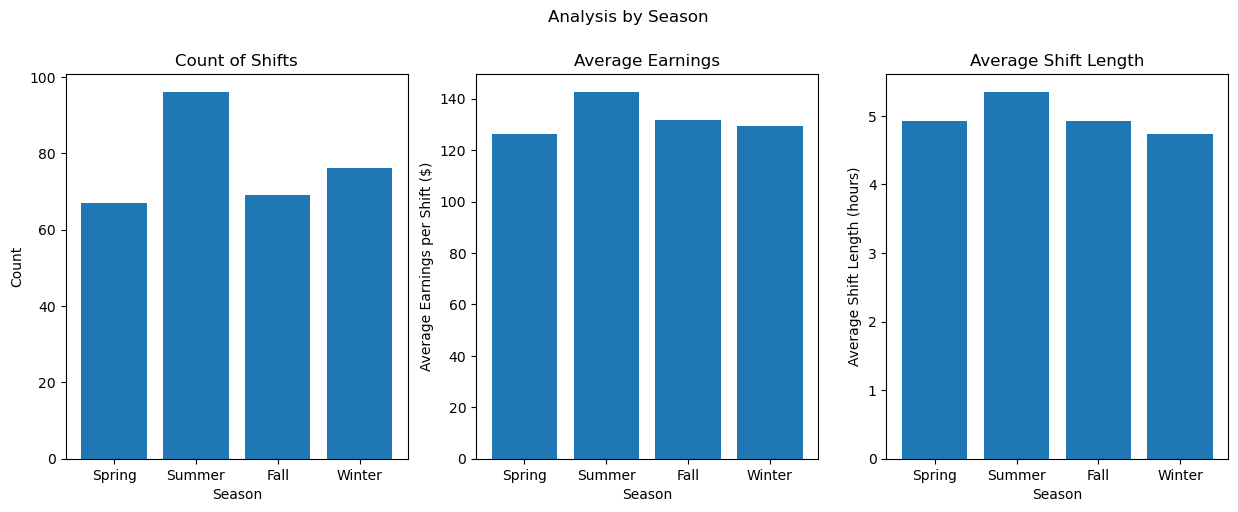

In [15]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

plt.suptitle("Analysis by Season", y=1.008)

# 1. amount of tips earned per season
season_series = df['Season'].value_counts()
season_series = df['Season'].value_counts().sort_index()
axes[0].bar(season_series.index, season_series.values)
axes[0].set_xlabel('Season')
axes[0].set_ylabel('Count')
axes[0].set_title('Count of Shifts')

# 2. average hourly rate for each season
avg_per_season = df.groupby('Season')['Earnings'].mean()
axes[1].bar(avg_per_season.index, avg_per_season.values)
axes[1].set_xlabel('Season')
axes[1].set_ylabel('Average Earnings per Shift ($)')
axes[1].set_title('Average Earnings')

# 3. average shift length by season
avg_shift_length = df.groupby('Season')['Duration'].mean()
axes[2].bar(avg_shift_length.index, avg_shift_length.values)
axes[2].set_xlabel('Season')
axes[2].set_ylabel('Average Shift Length (hours)')
axes[2].set_title('Average Shift Length')

plt.show()

#### Barchart 5

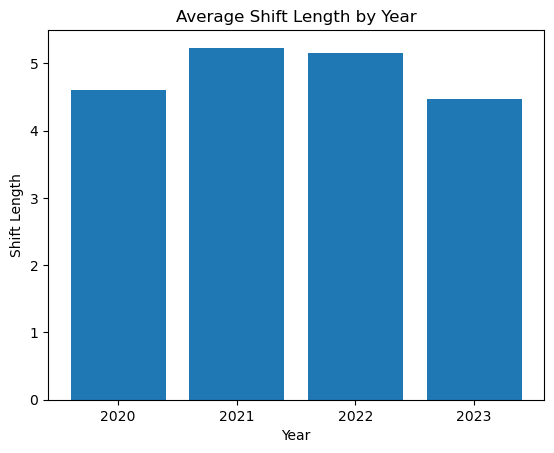

In [16]:
# duration average by year
fig, ax = plt.subplots()

dur_avg_year = df.groupby('Year')['Duration'].mean()
ax.bar(dur_avg_year.index, dur_avg_year.values)
ax.set_xlabel('Year')
ax.set_xticks(dur_avg_year.index)
ax.set_ylabel('Shift Length')
ax.set_title('Average Shift Length by Year')

plt.show()

#### Barchart 6

/var/folders/8l/b4fvd6ps1t9_651ysh_n9rcr0000gn/T/ipykernel_29690/858351673.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dur_avg_season = df.groupby('Season')['Duration'].mean()


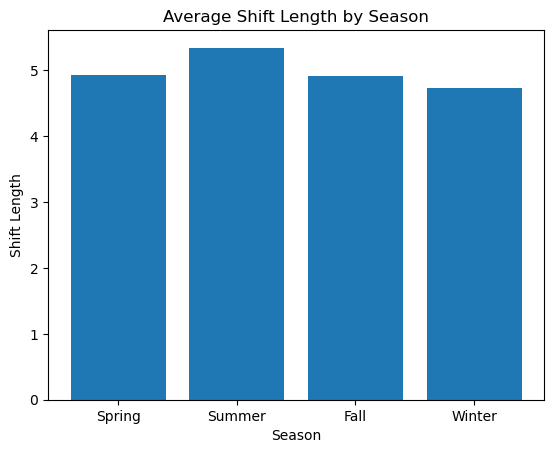

In [17]:
# duration average by season
fig, ax = plt.subplots()

dur_avg_season = df.groupby('Season')['Duration'].mean()
ax.bar(dur_avg_season.index, dur_avg_season.values)
ax.set_xlabel('Season')
ax.set_xticks(dur_avg_season.index)
ax.set_ylabel('Shift Length')
ax.set_title('Average Shift Length by Season')

plt.show()

#### Barchart 7

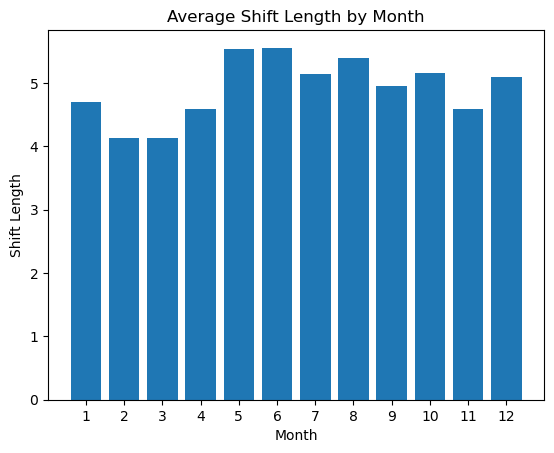

In [18]:
# duration average by month
fig, ax = plt.subplots()

dur_avg_month = df.groupby('Month')['Duration'].mean()
ax.bar(dur_avg_month.index, dur_avg_month.values)
ax.set_xlabel('Month')
ax.set_xticks(dur_avg_month.index)
ax.set_ylabel('Shift Length')
ax.set_title('Average Shift Length by Month')

plt.show()

#### Barchart 8

/var/folders/8l/b4fvd6ps1t9_651ysh_n9rcr0000gn/T/ipykernel_29690/4283860712.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dur_avg_weekday = df.groupby('Day of Week')['Duration'].mean()


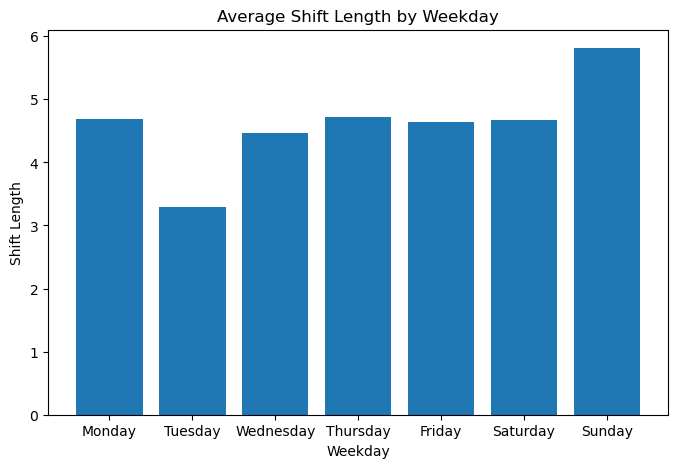

In [19]:
# duration average by Weekday
fig, ax = plt.subplots(figsize=(8,5))

dur_avg_weekday = df.groupby('Day of Week')['Duration'].mean()
ax.bar(dur_avg_weekday.index, dur_avg_weekday.values)
ax.set_xlabel('Weekday')
ax.set_xticks(dur_avg_weekday.index)
ax.set_ylabel('Shift Length')
ax.set_title('Average Shift Length by Weekday')

plt.show()

### Boxplot Analysis

In [20]:
# customize the markings on the chart
red_circles = dict(markerfacecolor='red', marker='o')
mean_shape  = dict(markerfacecolor='green', marker='D', markeredgecolor='green')

#### Boxplot 1

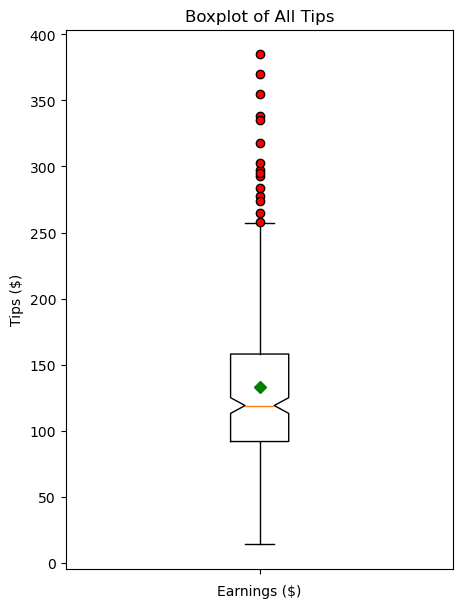

In [21]:
# boxplot of overall earnings pltsize -> (Height, Width)

# create the fig of the boxplot
fig, ax = plt.subplots(figsize=(5, 7))

# create the boxplot
ax.boxplot(df['Earnings'], notch=True, flierprops=red_circles, showmeans=True, meanprops=mean_shape)

# create plot title and axis labels
ax.set_title('Boxplot of All Tips')
ax.set_xlabel('Earnings ($)')
ax.set_ylabel('Tips ($)')
ax.set_xticklabels([])

plt.show()

#### Boxplot 2

In [22]:
# get the weekday name that exist in the data frame
day_names = df['Day of Week'].unique()

# create empty dict to story key/values: weekday name -> series of tips earned THAT day
weekday_tip_dict = {}

# loop to build dict weekdayName -> weekday tip series
for day in day_names:
  temp_day_trim = df[df['Day of Week'] == day]
  temp_tips = temp_day_trim['Earnings']
  weekday_tip_dict[day] = temp_tips

Text(0, 0.5, 'Earnings ($)')

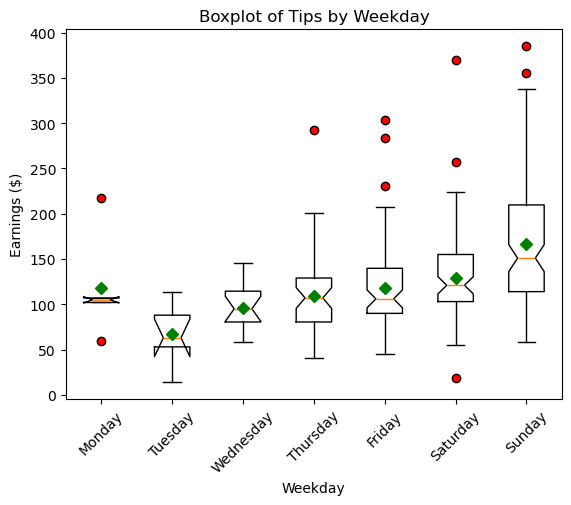

In [23]:
fig, ax = plt.subplots()
ax.boxplot(weekday_tip_dict.values(), notch=True, flierprops=red_circles, showmeans=True, meanprops=mean_shape)
ax.set_xticklabels(weekday_tip_dict.keys(), rotation=45)

# set titles/labels
ax.set_title('Boxplot of Tips by Weekday')
ax.set_xlabel('Weekday')
ax.set_ylabel('Earnings ($)')


#### Boxplot 3

In [24]:
# get the season name that exist in the data frame
season_names = df['Season'].unique()

# create empty dict to story key/values: weekday name -> series of tips earned THAT day
season_tip_dict = {}

# loop to build dict weekdayName -> weekday tip series
for season in season_names:
  temp_season_trim = df[df['Season'] == season]
  temp_tips = temp_season_trim['Earnings']
  season_tip_dict[season] = temp_tips

Text(0, 0.5, 'Earnings ($)')

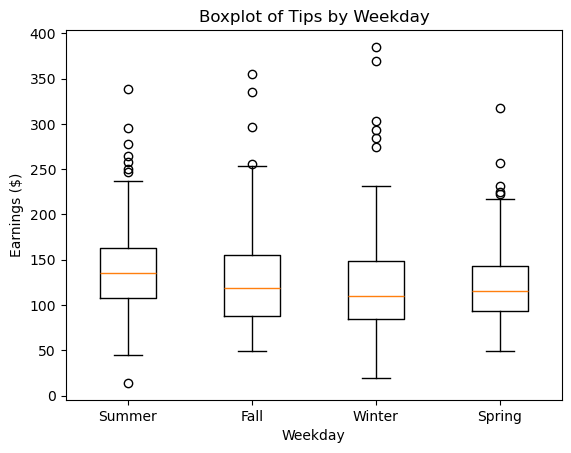

In [25]:
# code to create the boxplots for each day of the week
fig, ax = plt.subplots()
# ax.boxplot(weekday_tip_dict.values(), notch=True, flierprops=red_circles, showmeans=True, meanprops=mean_shape)
ax.boxplot(season_tip_dict.values())
ax.set_xticklabels(season_tip_dict.keys())

# set titles/labels
ax.set_title('Boxplot of Tips by Weekday')
ax.set_xlabel('Weekday')
ax.set_ylabel('Earnings ($)')
